# ________DEFINE OUR TRAINING MODEL_____

# 

#     IMPORTING THE LIBRARY

In [1]:
import tensorflow as tf 
import keras
import cv2
import os
from os import listdir
import numpy as np 
from sklearn.datasets import load_files

from keras.preprocessing import image
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle           

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import np_utils
import matplotlib.pyplot as plt

# 

# READING THE DATASET

In [2]:
def load_dataset(path):
    data=load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [3]:
print("------------------------------")
print("Training image:")
X_train, y_train, target_labels = load_dataset('train')
print(' Loaded')
print("\n------------------------------")
print("Testing image:")
X_test, y_test, _ = load_dataset('test')
print(' Loaded')
print("------------------------------")

------------------------------
Training image:
 Loaded

------------------------------
Testing image:
 Loaded
------------------------------


In [4]:
n_class=81
print('Training set samples:', X_train.shape[0])
print('Test set samples:', X_test.shape[0])
print('number of categories: ', n_class)

Training set samples: 41322
Test set samples: 13877
number of categories:  81


In [5]:
y_train=np_utils.to_categorical(y_train, n_class)
y_test=np_utils.to_categorical(y_test, n_class)

In [7]:
def convert_to_array(pics):
    img_arr =[]
    for pic in pics:
        img_arr.append(img_to_array(load_img(pic)))
    return img_arr

In [8]:
X_train = np.array(convert_to_array(X_train))
X_test = np.array(convert_to_array(X_test))
print("----- Done -----")

----- Done -----


In [9]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print("----- Done -----")

----- Done -----


In [10]:
print('data reshaped')
print('sample shape for model input: ',X_train[0].shape)

data reshaped
sample shape for model input:  (100, 100, 3)


In [11]:
X_train,y_train  =  shuffle(X_train, y_train, random_state=20)

# 

# Define Our Model 

In [3]:
print("Building Convolutional Neural Network.....")

CNN = tf.keras.models.Sequential()
CNN.add(Conv2D(64, (3, 3), activation=('relu'), padding='same', input_shape= (100, 100, 3) ) )
CNN.add(Conv2D(64, (3, 3), activation=('relu'), padding='same' ) )
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(32, (3, 3), activation=('relu'), padding='same' ) )
CNN.add(Conv2D(32, (3, 3), activation=('relu'), padding='same' ) )
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Flatten())
CNN.add(Dense(512,  activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(81, activation=('softmax') ) )


CNN.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

print("----- Done -----")
CNN.summary()

Building Convolutional Neural Network.....
----- Done -----
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        9248      
____________________________________________________________

# Train The Module

In [13]:
print("_____Start_Training_____")
history = CNN.fit(X_train, y_train, batch_size=32, epochs=5, validation_split = 0.2)

_____Start_Training_____
Epoch 1/5
1034/1034 [==============================] - 8138s 8s/step - loss: 1.0410 - accuracy: 0.7189 - val_loss: 0.0821 - val_accuracy: 0.9746
Epoch 2/5
1034/1034 [==============================] - 8143s 8s/step - loss: 0.1402 - accuracy: 0.9535 - val_loss: 0.0121 - val_accuracy: 0.9936
Epoch 3/5
1034/1034 [==============================] - 8148s 8s/step - loss: 0.0971 - accuracy: 0.9686 - val_loss: 0.0199 - val_accuracy: 0.9914
Epoch 4/5
1034/1034 [==============================] - 8136s 8s/step - loss: 0.0757 - accuracy: 0.9743 - val_loss: 0.0310 - val_accuracy: 0.9866
Epoch 5/5
1034/1034 [==============================] - 8156s 8s/step - loss: 0.0682 - accuracy: 0.9773 - val_loss: 0.0094 - val_accuracy: 0.9935


# 

In [14]:
loss, accuracy = CNN.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
print("\n------------------------------------------\n")
loss, accuracy = CNN.evaluate(X_test, y_test, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
print("Validation Loss: {:.4f}".format(loss))
print("##############################################")

Training Accuracy: 0.9945
Training Loss: 0.0087

------------------------------------------

Validation Accuracy:  0.9444
Validation Loss: 0.2742
##############################################


In [15]:
predictions = CNN.predict(X_test)                  # Vector of probabilities
predict = np.argmax(predictions, axis = 1)         # We take the highest probability

# 

# Accuracy and Losses visualisation 


summarize history for accuracy

In [16]:
def plot_history(history):
    plt.style.use('ggplot')
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

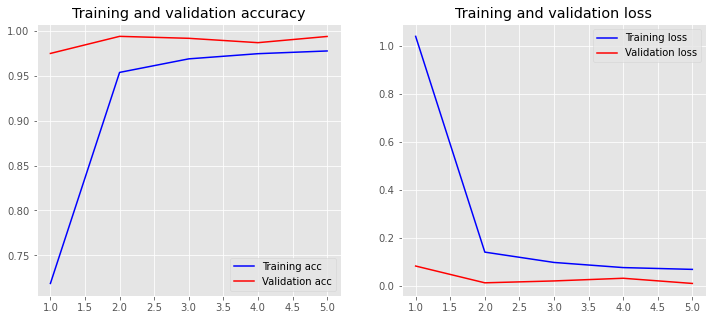

In [17]:
plot_history(history)

# 

#   Save The Module

In [19]:
CNN.save("TRINED_MODEL.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: TRINED_MODEL.model\assets
